In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

In [67]:
import spatial_tda as tda

In [68]:
grid_size = 9
r_seed = 42

In [69]:
gdf_none = generate_grid_dataframe(grid_size, autocorrelation="none", random_seed=r_seed)        # No spatial correlation
gdf_positive = generate_grid_dataframe(grid_size, autocorrelation="positive", random_seed=r_seed)  # Positive spatial correlation

In [70]:
gdf_none.head(2)

,Index,Value,geometry
0,0,16,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,1,11,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"


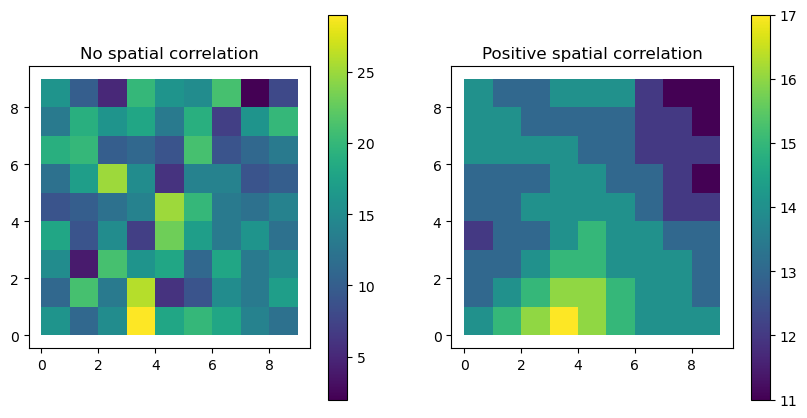

In [71]:
# plot value column
fig, ax = plt.subplots(1,2, figsize=(10,5))
gdf_none.plot(column='Value', ax=ax[0], legend=True)
gdf_positive.plot(column='Value', ax=ax[1], legend=True)
ax[0].set_title('No spatial correlation')
ax[1].set_title('Positive spatial correlation')
plt.show()

In [72]:
gdf_positive.head(10)

,Index,Value,geometry
0,0,14,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,1,15,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"
2,2,16,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))"
3,3,17,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))"
4,4,16,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))"
5,5,15,"POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))"
6,6,14,"POLYGON ((6 0, 7 0, 7 1, 6 1, 6 0))"
7,7,14,"POLYGON ((7 0, 8 0, 8 1, 7 1, 7 0))"
8,8,14,"POLYGON ((8 0, 9 0, 9 1, 8 1, 8 0))"
9,9,13,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))"


In [85]:
positive_valules = gdf_none['Value'].values

In [86]:
positive_valules

array([16, 11, 15, 29, 18, 20, 18, 14, 12, 11, 21, 13, 26,  6,  9, 15, 13,
       17, 15,  4, 21, 16, 18, 11, 18, 13, 15, 18,  9, 15,  7, 23, 17, 13,
       16, 12,  9, 10, 12, 14, 25, 20, 13, 12, 14, 12, 17, 25, 15,  6, 14,
       14,  9, 10, 19, 20, 10, 11,  9, 21,  9, 11, 13, 13, 19, 16, 18, 13,
       19,  7, 16, 20, 16, 10,  5, 20, 16, 15, 21,  2,  8])

In [87]:
adjacency_simplex = tda.AdjacencySimplex(geo_dataframe=gdf_none, variable = "Value", threshold=None, filter_method='down')

adjacency_simplex.filter_sort_gdf()

adjacency_simplex.calculate_adjacent_countries()

adjacency_simplex.form_simplicial_complex()


In [88]:
oberved = adjacency_simplex.compute_persistence()

In [89]:
oberved_tl = oberved['TL']

In [90]:
permuted_tl = []

In [91]:
for i in range(1000):

    # sets the random seed

    np.random.shuffle(positive_valules)
    # print(positive_valules)
    gdf_none['Value'] = positive_valules

    adjacency_simplex = tda.AdjacencySimplex(geo_dataframe=gdf_none, variable = "Value", threshold=None, filter_method='down')
    adjacency_simplex.filter_sort_gdf()
    adjacency_simplex.calculate_adjacent_countries()
    adjacency_simplex.form_simplicial_complex()

    permutation = adjacency_simplex.compute_persistence()
    permutation_tl_ = permutation['TL']
    permuted_tl.append(permutation_tl_)

In [92]:
# permuted_tl

# p_value = tda.compute_p_value(oberved_tl, permuted_tl)

len(permuted_tl)

# get the mean of the permuted values
mean_permuted = np.mean(permuted_tl)

print(mean_permuted)


1251.609


In [93]:
mean_per_observed_diff = abs(oberved_tl - mean_permuted)


In [94]:
count = 0
for i in range(len(permuted_tl)):

    mean_per_permuted_diff = mean_permuted - permuted_tl[i]
    # get the absolute value of the difference
    mean_per_permuted_diff = abs(mean_per_permuted_diff)

    if mean_per_permuted_diff >= mean_per_observed_diff:
        # print('True')
        count += 1

p_value = (count+1)/(len(permuted_tl)+1)

print(p_value)

0.34765234765234765


In [95]:
if p_value > 0.05:
    print('No significant spatial correlation')
else:
    print('Significant spatial correlation')

No significant spatial correlation


In [9]:
adjacency_simplex = tda.AdjacencySimplex(geo_dataframe=gdf_positive, variable = "Value", threshold=None, filter_method='down')

adjacency_simplex.filter_sort_gdf()

adjacency_simplex.calculate_adjacent_countries()

adjacency_simplex.form_simplicial_complex()


In [10]:
adjacency_simplex.plot_simplicial_complex()


GIF created and saved as adj_simplex_Value_down.gif.
